In [37]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#display full array
np.set_printoptions(threshold=np.nan)

#applying T-SNE on the grain varieties dataset
df = pd.read_csv('data/seeds.csv',header=None)

#Exclude last column
x = df.iloc[0:,:7].values

# another way of creating array
#x = df[df.columns[0:7]].values

category = np.array(df[df.columns[7:8]])

# ravel is equivalent to reshape(-1,order=order). flattens into a contiguous array 
category = np.ravel(category)

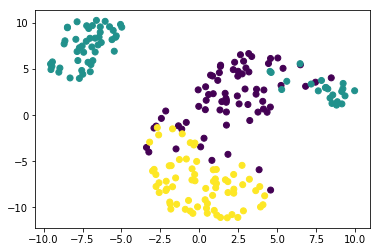

In [9]:
# TSNE model
# good to chose learning rate between 50 and 200
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(x)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by category
plt.scatter(xs,ys,c=category)
plt.show()

#t_SNE separated the three varieties of grain samples

In [194]:
# applying T-SNE to stock market data

df1 = pd.read_csv('data/stock-move-2010-2015.csv')

#Exclude last column
#xm = df.iloc[0:,:7].values

# another way of creating array
#x = df[df.columns[0:7]].values

data = df1.iloc[0:,1:].values 

category = np.array(df1[df1.columns[0]])

# ravel is equivalent to reshape(-1,order=order). flattens into a contiguous array 
category = np.ravel(category)

#why Normalize: this is a sparse dataset. Convert unit norm to one 
norm = Normalizer(norm='l2').fit(data)
norm1 = norm.transform(data)

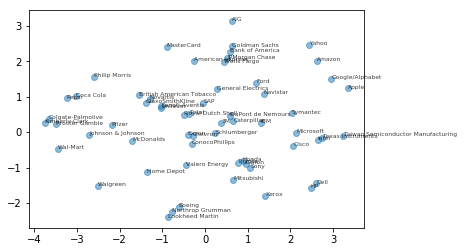

In [195]:
# using 50 as learning rate
model1 = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne1 = model1.fit_transform(norm1)

#print(tsne1)
# Select the 0th feature: xs
xs = tsne1[:,0]

# Select the 1th feature: ys
ys = tsne1[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, category):
    plt.annotate(company, (x, y), fontsize=6, alpha=0.75)
plt.show()